# Autism Progression Detection Model

# Import Libraries

In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/sachinharshitha/Library/Python/3.9/lib/python/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/U

AttributeError: _ARRAY_API not found

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

# Set paths and parameters

In [10]:
data_dir = './Dataset'  # Assuming Dataset is in the current directory
img_size = (128, 128)
batch_size = 32

# Data augmentation and loading

In [4]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load data with subclasses
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 927 images belonging to 3 classes.
Found 230 images belonging to 3 classes.


# Build the model

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/Users/sachinharshitha/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-15 21:07:46.734144: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-11-15 21:07:46.734178: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-11-15 21:07:46.734199: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-11-15 21:07:46.734229: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-15 21:07:46.734256: I tensorflow/core/common_runtime/pluggable_device/pluggable_device

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [6]:
epochs = 20
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/20


2024-11-15 21:07:58.416015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/Users/sachinharshitha/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.3376 - loss: 1.2467 - val_accuracy: 0.3259 - val_loss: 1.0981
Epoch 2/20
 1/28 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.4062 - loss: 1.0897

2024-11-15 21:08:48.418776: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-15 21:08:48.418793: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16111324621044277732
2024-11-15 21:08:48.418797: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/sequential_1/dropout_1/stateless_dropout/stateless_random_uniform/StatelessRandomGetKeyCounter/_68]]
2024-11-15 21:08:48.418818: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6372632867186220989
2024-11-15 21:08:48.418821: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17233311905701220453
2024-11-15 21:08:48.418823: I tensorflow/core/framewor

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4062 - loss: 1.0897 - val_accuracy: 0.3333 - val_loss: 1.1178
Epoch 3/20


2024-11-15 21:08:48.838926: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[ArgMax/_6]]
2024-11-15 21:08:48.838940: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7516051713485946967
2024-11-15 21:08:48.838943: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10664699598231081735
2024-11-15 21:08:48.838946: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 168061258024295431
2024-11-15 21:08:48.838949: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6894464946678017367
2024-11-15 21:08:48.838952: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 9053976271508419625
2024-11-15 21:08:48.838958: I tensorflow/core/framework

28/28 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.3495 - loss: 1.0937 - val_accuracy: 0.6116 - val_loss: 0.8895
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 1.0410 - val_accuracy: 0.3333 - val_loss: 0.9662
Epoch 5/20


2024-11-15 21:09:35.151749: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16111324621044277732
2024-11-15 21:09:35.152001: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12685171502934483658
2024-11-15 21:09:35.152007: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6344239389511107214
2024-11-15 21:09:35.152010: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17233311905701220453
2024-11-15 21:09:35.152027: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6372632867186220989
2024-11-15 21:09:35.152030: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6828454864014742207
2024-11-15 21:09:35.152032: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv 

28/28 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.4021 - loss: 1.0356 - val_accuracy: 0.5759 - val_loss: 0.8234
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5312 - loss: 0.9615 - val_accuracy: 0.6667 - val_loss: 0.7284
Epoch 7/20


2024-11-15 21:10:21.635374: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6160880069741713378
2024-11-15 21:10:21.635396: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 35398278838016124
2024-11-15 21:10:21.635400: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12685171502934483658
2024-11-15 21:10:21.635402: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12528845225787008102
2024-11-15 21:10:21.635405: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2017064621173411084
2024-11-15 21:10:21.635407: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 8385085751587233637
2024-11-15 21:10:21.635416: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv ite

28/28 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.3934 - loss: 1.0503 - val_accuracy: 0.5491 - val_loss: 0.8534
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4375 - loss: 1.0307 - val_accuracy: 0.6667 - val_loss: 1.0466
Epoch 9/20


2024-11-15 21:11:08.053800: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16111324621044277732
2024-11-15 21:11:08.053814: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12685171502934483658
2024-11-15 21:11:08.053817: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6344239389511107214
2024-11-15 21:11:08.053820: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12528845225787008102
2024-11-15 21:11:08.053824: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5222466161762509826
2024-11-15 21:11:08.053827: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15944657478424018834
2024-11-15 21:11:08.053867: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv

28/28 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.4040 - loss: 1.0256 - val_accuracy: 0.6071 - val_loss: 0.7837
Epoch 10/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4062 - loss: 0.9272 - val_accuracy: 0.1667 - val_loss: 0.9145
Epoch 11/20


2024-11-15 21:11:54.800940: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6763236944707418704
2024-11-15 21:11:54.800960: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16483045606010647850
2024-11-15 21:11:54.800964: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15525552486901413588
2024-11-15 21:11:54.800967: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17233311905701220453
2024-11-15 21:11:54.800978: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16111324621044277732
2024-11-15 21:11:54.801033: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 557022611324490408
2024-11-15 21:11:54.801048: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv 

28/28 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.4059 - loss: 1.0078 - val_accuracy: 0.5045 - val_loss: 0.9415
Epoch 12/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 0.9060 - val_accuracy: 0.3333 - val_loss: 1.1236
Epoch 13/20


2024-11-15 21:12:41.232382: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17233311905701220453
2024-11-15 21:12:41.232395: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 8385085751587233637
2024-11-15 21:12:41.232398: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6372632867186220989
2024-11-15 21:12:41.232401: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14584644032507438533
2024-11-15 21:12:41.232403: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3469650968196001689
2024-11-15 21:12:41.232407: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6160880069741713378
2024-11-15 21:12:41.232410: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv i

28/28 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.4205 - loss: 1.0325 - val_accuracy: 0.6071 - val_loss: 0.8373
Epoch 14/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4375 - loss: 1.0000 - val_accuracy: 0.8333 - val_loss: 1.0568
Epoch 15/20


2024-11-15 21:13:27.619843: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17233311905701220453
2024-11-15 21:13:27.619856: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 8385085751587233637
2024-11-15 21:13:27.619859: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6828454864014742207
2024-11-15 21:13:27.619872: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14584644032507438533
2024-11-15 21:13:27.619878: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3982017089529571055
2024-11-15 21:13:27.619881: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10807353909495207449
2024-11-15 21:13:27.619883: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv 

28/28 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.4127 - loss: 1.0208 - val_accuracy: 0.5670 - val_loss: 0.8078
Epoch 16/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4688 - loss: 1.0468 - val_accuracy: 0.8333 - val_loss: 0.7913
Epoch 17/20


2024-11-15 21:14:14.169574: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16111324621044277732
2024-11-15 21:14:14.169589: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12685171502934483658
2024-11-15 21:14:14.169593: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6344239389511107214
2024-11-15 21:14:14.169596: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12528845225787008102
2024-11-15 21:14:14.169599: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5222466161762509826
2024-11-15 21:14:14.169602: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6856321471062288346
2024-11-15 21:14:14.169603: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send 

28/28 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.4483 - loss: 1.0069 - val_accuracy: 0.6071 - val_loss: 0.8220
Epoch 18/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 1.0562 - val_accuracy: 0.6667 - val_loss: 0.8142
Epoch 19/20


2024-11-15 21:15:00.467630: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16111324621044277732
2024-11-15 21:15:00.467643: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12685171502934483658
2024-11-15 21:15:00.467647: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6344239389511107214
2024-11-15 21:15:00.467652: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5222466161762509826
2024-11-15 21:15:00.467654: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12528845225787008102
2024-11-15 21:15:00.467657: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6856321471062288346
2024-11-15 21:15:00.467659: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv 

28/28 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.4472 - loss: 0.9921 - val_accuracy: 0.5938 - val_loss: 0.8121
Epoch 20/20
 1/28 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.3125 - loss: 1.0916

2024-11-15 21:15:46.695309: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13863011341883535278
2024-11-15 21:15:46.695323: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6763236944707418704
2024-11-15 21:15:46.695326: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12685171502934483658
2024-11-15 21:15:46.695328: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5222466161762509826
2024-11-15 21:15:46.695331: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15944657478424018834
2024-11-15 21:15:46.695397: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17233311905701220453
2024-11-15 21:15:46.695404: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3125 - loss: 1.0916 - val_accuracy: 0.8333 - val_loss: 0.6890


# Plot accuracy and loss

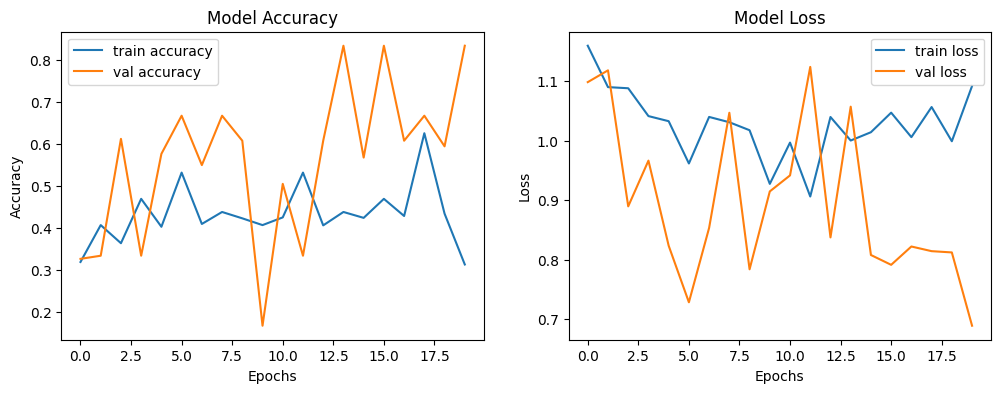

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

In [8]:
# Save the model
model.save('asd_progress_model.h5')

# Predict on a new image

In [9]:
# Function to prepare the image for prediction
def prepare_image(filepath, img_size):
    img = cv2.imread(filepath)
    img = cv2.resize(img, img_size)
    img = img / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)  # Expand dimensions to match model input
    return img

# Path to the test image
test_image_path = '/Users/sachinharshitha/Desktop/asd detection/Dataset/ASD/Mild/3-6 years/Coloring/IMG_20240401_134315.jpg'

# Load and preprocess the image
img = prepare_image(test_image_path, img_size)

# Make a prediction
prediction = model.predict(img)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)
class_labels = list(train_generator.class_indices.keys())  # Map index to class labels
print("Predicted class:", class_labels[predicted_class[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step
Predicted class: Non-ASD
